### Importing basic libraries

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data and creating a dataframe

In [32]:
df = pd.read_csv('insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## Explorative Data Analysis

### The Distribution of the charges in the dataset

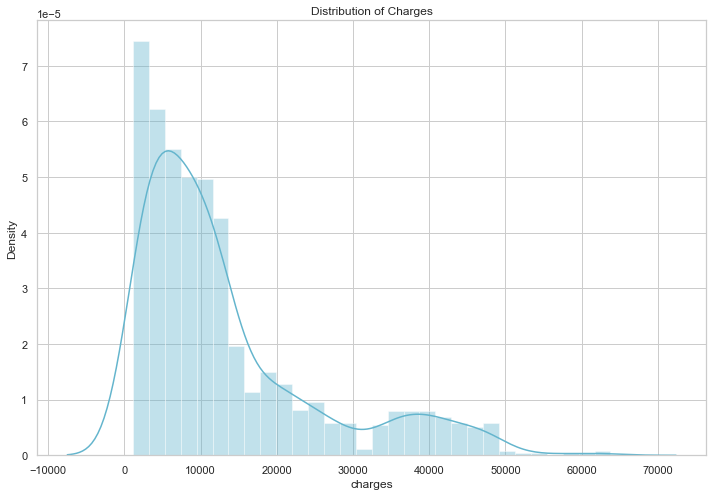

<Figure size 432x288 with 0 Axes>

In [33]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')
plt.show()
# save the plot into a file
plt.savefig('Distribution_of_Charges.png')

### The Distribution of the BMI in the dataset

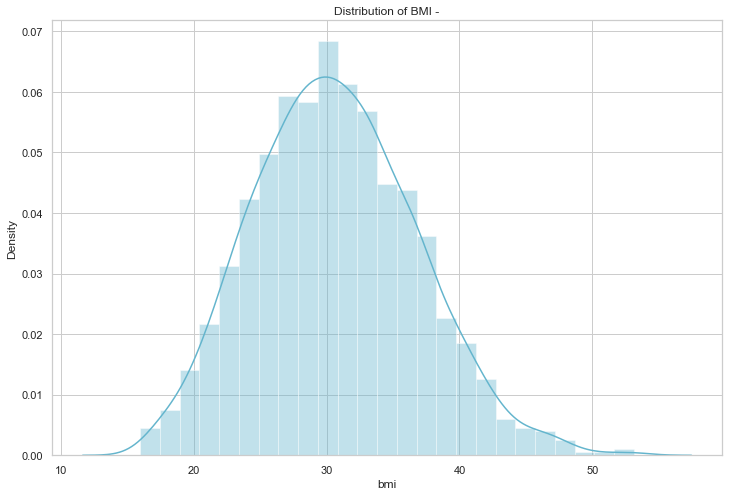

In [34]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['bmi'], kde = True, color = 'c')
plt.title('Distribution of BMI -')
plt.show()

### The Distribution of the Age in the dataset

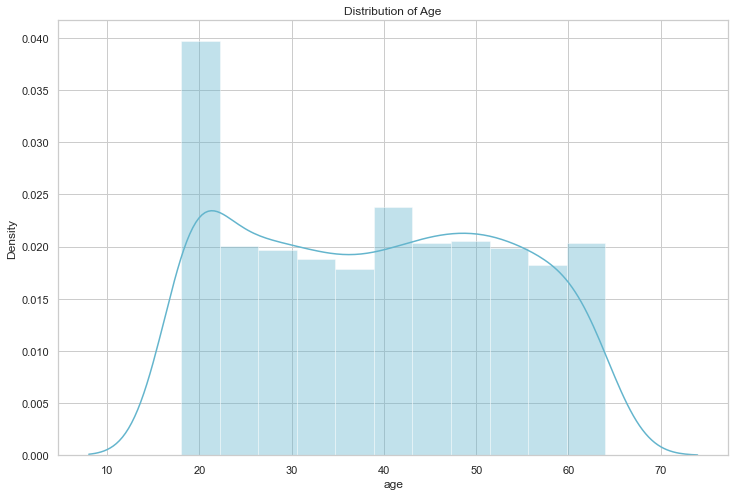

In [35]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['age'], kde = True, color = 'c')
plt.title('Distribution of Age')
plt.show()

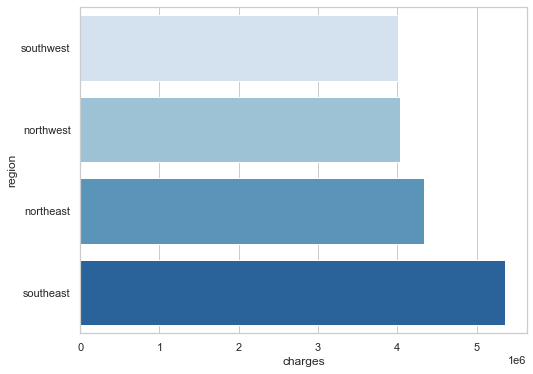

In [36]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

From the above plot , we can see that the Southeast region has the highest charges and the southwest region has the lowest charges.

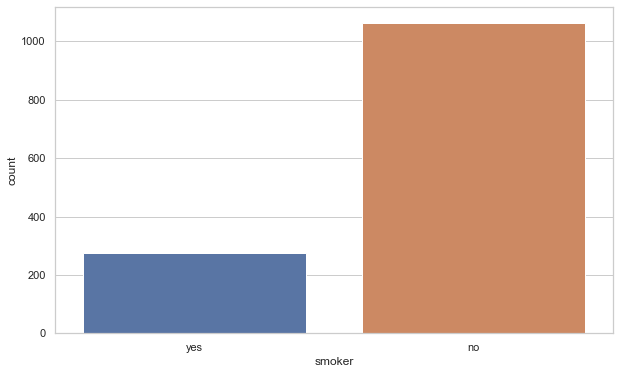

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='smoker')
plt.show()

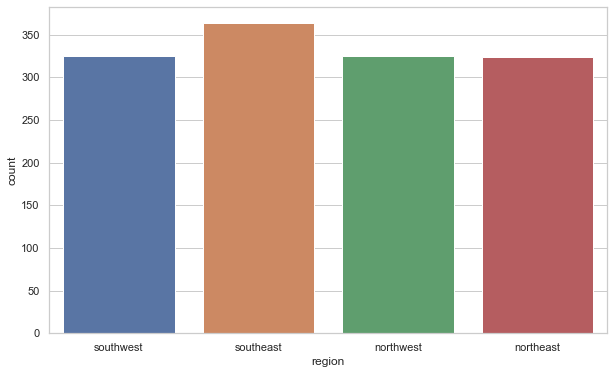

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='region')
plt.show()

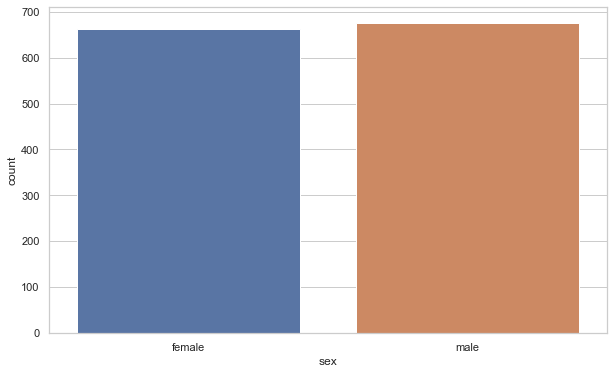

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sex')
plt.show()

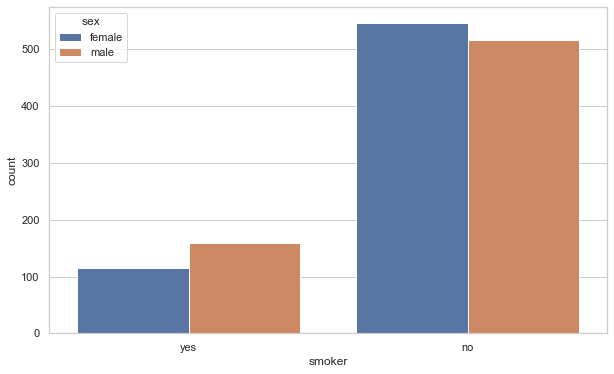

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='smoker', hue='sex')
plt.show()

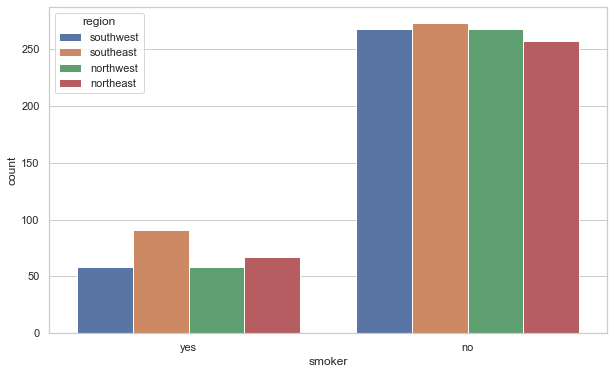

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='smoker', hue='region')
plt.show()

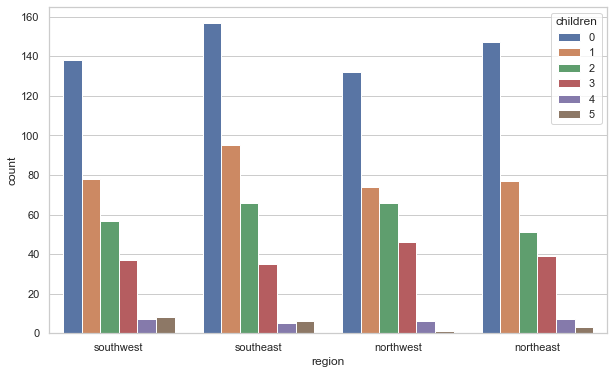

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, hue='children', x='region')
plt.show()

### Boxplot for the charges on the basis of smoking status

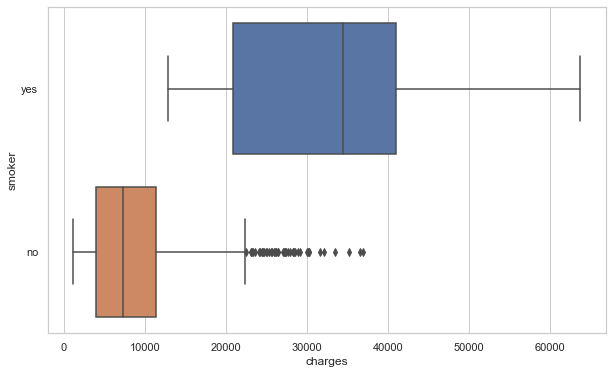

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='charges', y='smoker')
plt.show()

We can see that generally the smokers have higher charges than the non-smokers.

### Boxplot for the charges on the basis of region with smoking status

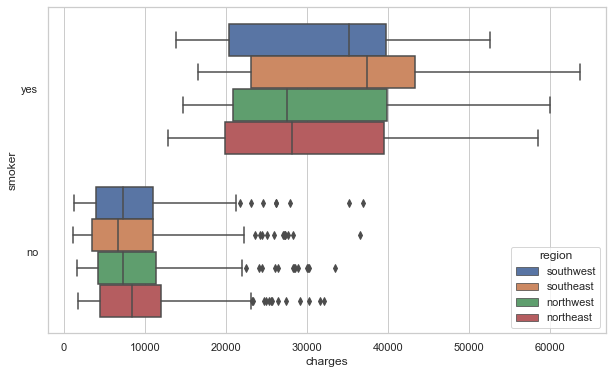

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='charges', y='smoker', hue='region')
plt.show()

We can observe that the charges are higher in patients who smoke and are residing in the Southeast region.

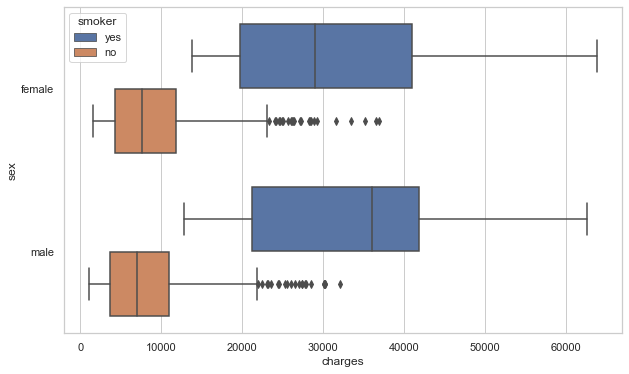

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='charges', y='sex', hue='smoker')
plt.show()

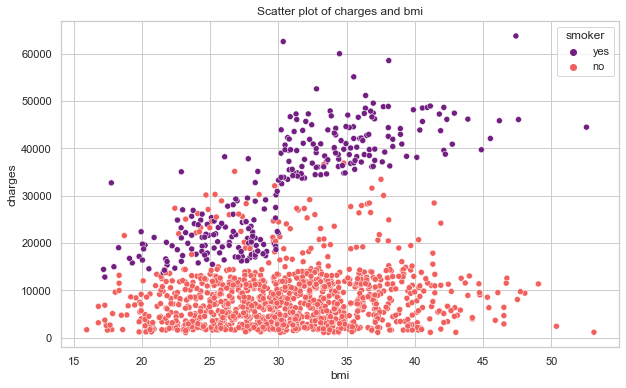

In [46]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
plt.show()

## Label encoding
Since regression models cannot understand non-numeric data, we need to encode the categorical variables.Therefore we will use label encoding.
Label Encoding is a technique used to convert categorical variables into numeric variables by assigning a unique integer to each category.

In [47]:
from sklearn.preprocessing import LabelEncoder
data = df

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le1.fit(data.sex.drop_duplicates()) 
data.sex = le1.transform(data.sex)

le2.fit(data.smoker.drop_duplicates()) 
data.smoker = le2.transform(data.smoker)

le3.fit(data.region.drop_duplicates()) 
data.region = le3.transform(data.region)

## Distrubution of charges on the basis of smoking status

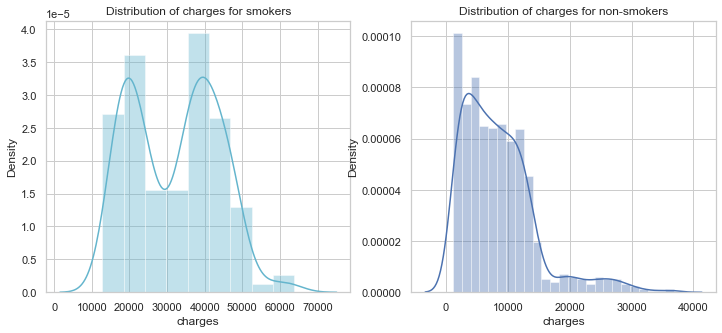

In [48]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Encoded data
- We also add another column theta0 which is the bias of the model.

In [50]:
df_main = df 
df_main ['theta0'] = 1
df_main .head(3)

,age,sex,bmi,children,smoker,region,charges,theta0
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
2,28,1,33.00,3,0,2,4449.4620,1


In [52]:
df_main.describe()

,age,sex,bmi,children,smoker,region,charges,theta0
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.0
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,1.0
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.0
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,1.0
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,1.0
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.0
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.0
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.0


In [53]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
 7   theta0    1338 non-null   int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 68.1 KB


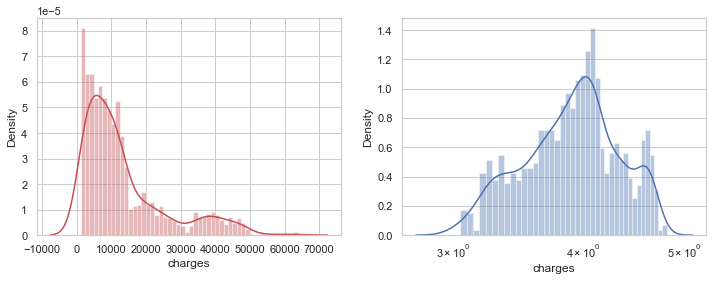

In [87]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_xscale('log')

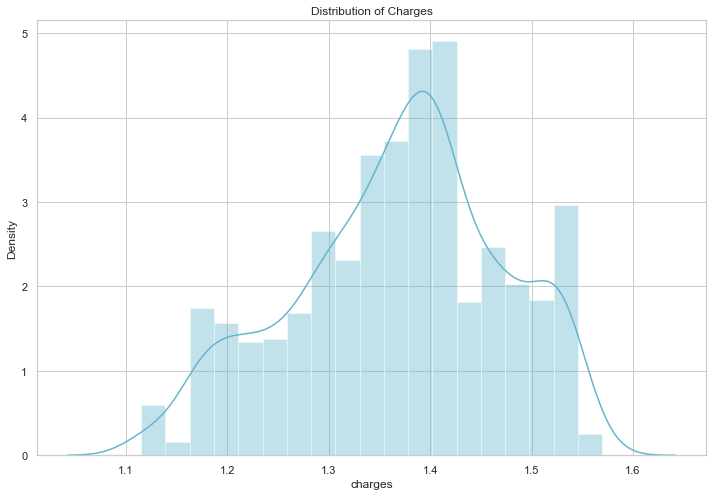

<Figure size 432x288 with 0 Axes>

In [113]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(np.log(df['charges']), kde = True, color = 'c')
plt.title('Distribution of Charges')
plt.show()
# save the plot into a file
plt.savefig('Distribution_of_Charges.png')

In [88]:
df['charges'] = np.log10(df['charges'])

### Splitting the data into X and y

In [89]:
X = np.array(df[['age','sex','bmi','children','smoker','region','theta0']])
y = np.array(df[['charges']])
print(X.shape , y.shape)

(1338, 7) (1338, 1)


### We split the data into training and test data sets. 
This is done to ensure that the model is not overfitting the training data and to gather better metrics of the model.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Standardizing the data
Before fitting the model we standardize the data.


$$ \hat{X} = \frac{\hat{X} - mean}{std} $$

We do this for each column of the data. This is done to ensure zero mean and standard deviation of 1.

In [91]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
X_train_scaled.shape, X_test_scaled.shape

((1070, 7), (268, 7))

### Hypothesis function

$$ h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{1}^{2} +  \theta_{3}x_{1}x_{2}…  + \theta_{n}x_{1}^{n} $$

In [93]:
def hyp(theta,X):
    return np.dot(X,theta)

### Cost Function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 $$

In [94]:
def cost_function(theta,X,y):
    hx = hyp(theta,X) - y
    return float((np.dot(hx.T,hx))/(2*(X.shape[0])))

### Intialize theta as matrix of zeros 

In [95]:
initial_theta = np.zeros([X_train_scaled.shape[1],1])

cost_function(initial_theta,X_train_scaled,y_train)

7.880778318296334

In [96]:
print(hyp(initial_theta,X_train_scaled).shape )
theta = initial_theta 

(1070, 1)


### Gradient Descent
In this step we will update the values of theta using the formula,

$$ \theta_{j} = \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)} $$ 
(simaltaneously update $\theta_{j}$ for all j)

In [97]:
m = X.shape[0] 
alpha = 0.1
theta = initial_theta  
cost_func_graph = []
epochs = 20
for i in range(epochs):
    theta = theta - (alpha/m)*(np.dot(X_train_scaled.T , hyp(theta,X_train_scaled) - y_train))
    cost_func_graph.append(cost_function(theta,X_train_scaled,y_train))

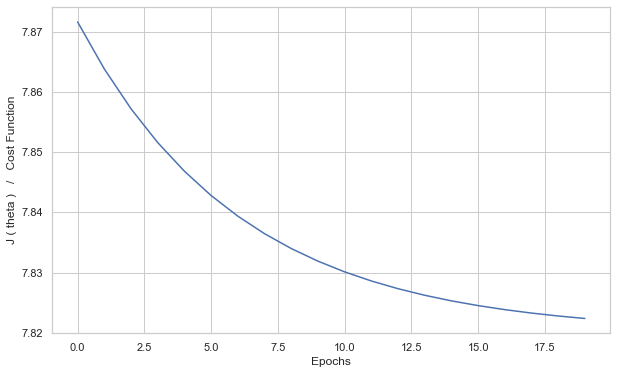

In [98]:
plt.figure(figsize=(10,6))
plt.plot([i for i in range(epochs)][:],cost_func_graph[:]) 
plt.xlabel("Epochs")
plt.ylabel("J ( theta )   /   Cost Function")
plt.grid(True)

In [99]:
# importing linear regression model
from sklearn.linear_model import LinearRegression
# instantiate linear regression model
lin_reg = LinearRegression()
# fit linear regression model
lin_reg.fit(X_train_scaled, y_train)
# predicting the response
y_pred = lin_reg.predict(X_test_scaled)

### Calculating metrics of the model

##### Mean absolute error 
$$ MAE = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) $$

##### Mean squared error
$$ MSE = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2 $$

##### Root mean squared error
$$ RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2} $$

In [100]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11463590866944107
Mean Squared Error: 0.03341387246282235
Root Mean Squared Error: 0.1827946182545382


#### Ridge Regression

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \frac{1}{2} \sum_{j=1}^{n} \theta_{j}^2 $$

In [101]:
from sklearn.linear_model import Ridge
# instantiate ridge regression model
ridge_reg = Ridge(alpha=0.3)
# fit ridge regression model
ridge_reg.fit(X_train_scaled, y_train)
# predicting the response
y_pred = ridge_reg.predict(X_test_scaled)

In [102]:
## Metrics 
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11463888448117528
Mean Squared Error: 0.033412543206304
Root Mean Squared Error: 0.18279098228934598


### Lasso Regression

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \frac{1}{2} \sum_{j=1}^{n} |\theta_{j}| $$

In [103]:
# import lasso
from sklearn.linear_model import Lasso
# create lasso object
lasso_reg = Lasso(alpha=0.1)
# fit the model
lasso_reg.fit(X_train_scaled, y_train)
# predict the response
y_pred = lasso_reg.predict(X_test_scaled)

In [104]:
## Metrics 
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.17328313905616108
Mean Squared Error: 0.057240176995579095
Root Mean Squared Error: 0.2392491943467712


## Polynomial Regression 

### Converting to Polynomial Features
$$ y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{1}^{2} +  \theta_{3}x_{1}x_{2}…  + \theta_{n}x_{1}^{n} $$

In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
scaler = StandardScaler()
degree = 2 
polyreg = make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg.fit(X_train,y_train)
y_pred = polyreg.predict(X_test)

In [106]:
## Metrics 
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09278325410633204
Mean Squared Error: 0.02178111623858341
Root Mean Squared Error: 0.1475842682625198


### Comparing the model with random forest regression

In [107]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, criterion = 'mse',
                            random_state = 1,n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [108]:
for i in range(len(rf.feature_importances_)):
    print("Feature: " + str(i) + "  " + "Importance: " + str(rf.feature_importances_[i]))

Feature: 0  Importance: 0.38589843006773406
Feature: 1  Importance: 0.010701994464421745
Feature: 2  Importance: 0.1075321995807927
Feature: 3  Importance: 0.041509412473184286
Feature: 4  Importance: 0.4320931692342861
Feature: 5  Importance: 0.022264794179581097
Feature: 6  Importance: 0.0


### Metrics of the model

In [109]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Mean Absolute Error:',mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.08546111917259604
Mean Squared Error: 0.02231541125705906
Root Mean Squared Error: 0.14938343702385168


### Comparing the model with Decision Tree Regressor

In [110]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [111]:
for i in range(len(dt.feature_importances_)):
    print("Feature: " + str(i) + "  " + "Importance: " + str(dt.feature_importances_[i]))

Feature: 0  Importance: 0.3852237692448036
Feature: 1  Importance: 0.008590950975462466
Feature: 2  Importance: 0.11675837758161577
Feature: 3  Importance: 0.03646984417123915
Feature: 4  Importance: 0.4345337996115066
Feature: 5  Importance: 0.01842325841537253
Feature: 6  Importance: 0.0


In [112]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)    

print(f'Mean Absolute Error : {mean_absolute_error(y_test, y_test_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test, y_test_pred)}')
print(f'Root Mean Squared Error : { np.sqrt(mean_squared_error(y_test, y_test_pred))}')           

Mean Absolute Error : 0.11141017461344045
Mean Squared Error : 0.050477963408508485
Root Mean Squared Error : 0.22467301441986415


#### Results 
From the above results we can see that the polynomial regression model is performing best. 

Insurance is a policy that tries to decrease costs occured by accident or illness.This can be influenced by the various factors. We use different regression techniques to predict the cost of insurance and compare the results. 